In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing data from csv file

data = pd.read_csv("ex1data.csv", names = ["Population","Profits"])

In [3]:
#checking data

data.head()

,Population,Profits
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
# Assigning values to X and y; Calculating the number of training examples

X = data.iloc[:,0]
y = data.iloc[:,1]
m = len(data)

<IPython.core.display.Javascript object>


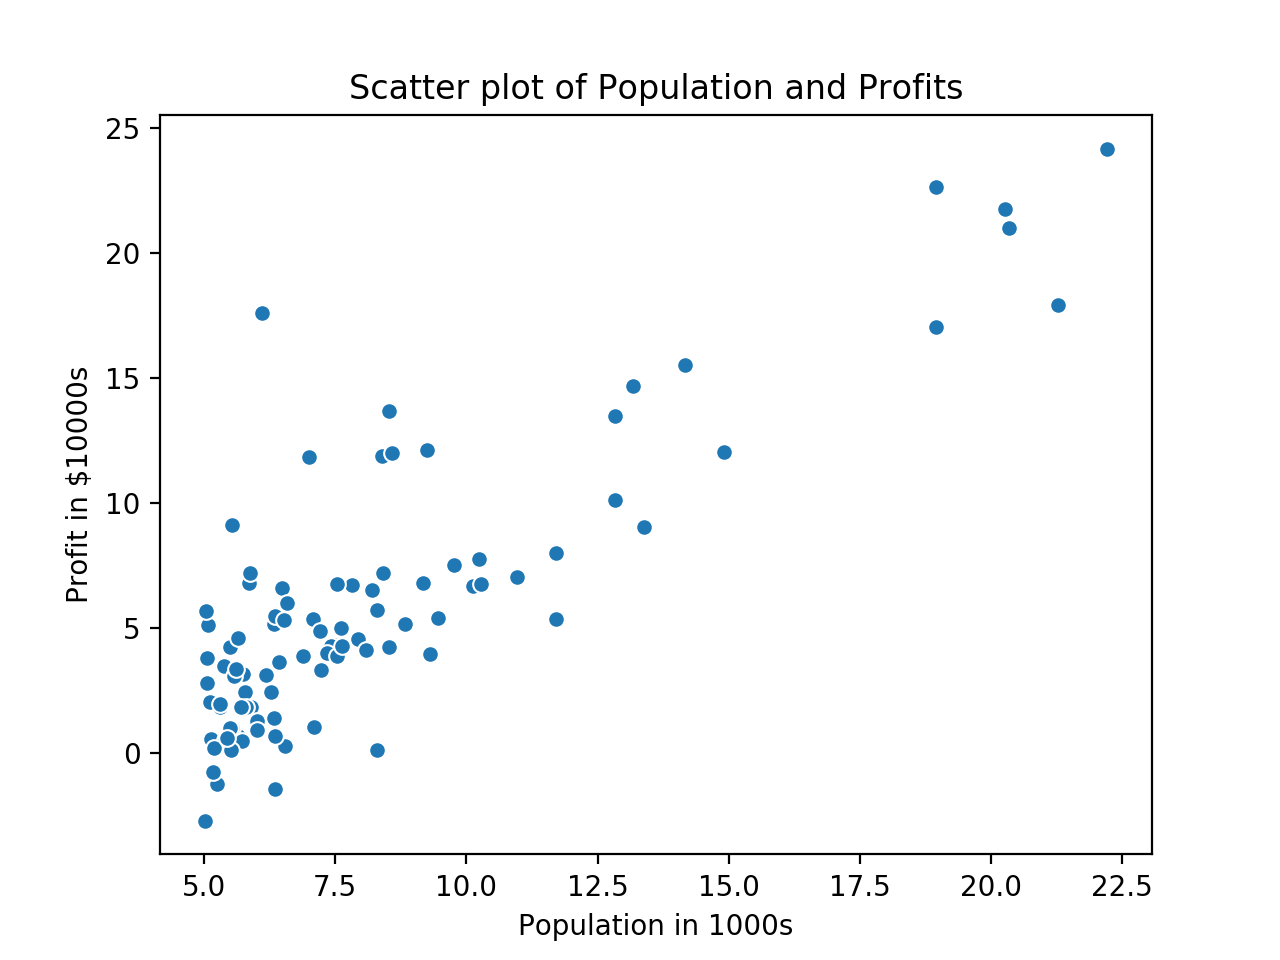

Text(0, 0.5, 'Profit in $10000s')

In [5]:
# Plotting a scatter plot of Population vs Profits

%matplotlib notebook
plt.figure()
sns.scatterplot(X,y)
plt.title("Scatter plot of Population and Profits")
plt.xlabel("Population in 1000s")
plt.ylabel("Profit in $10000s")

<IPython.core.display.Javascript object>


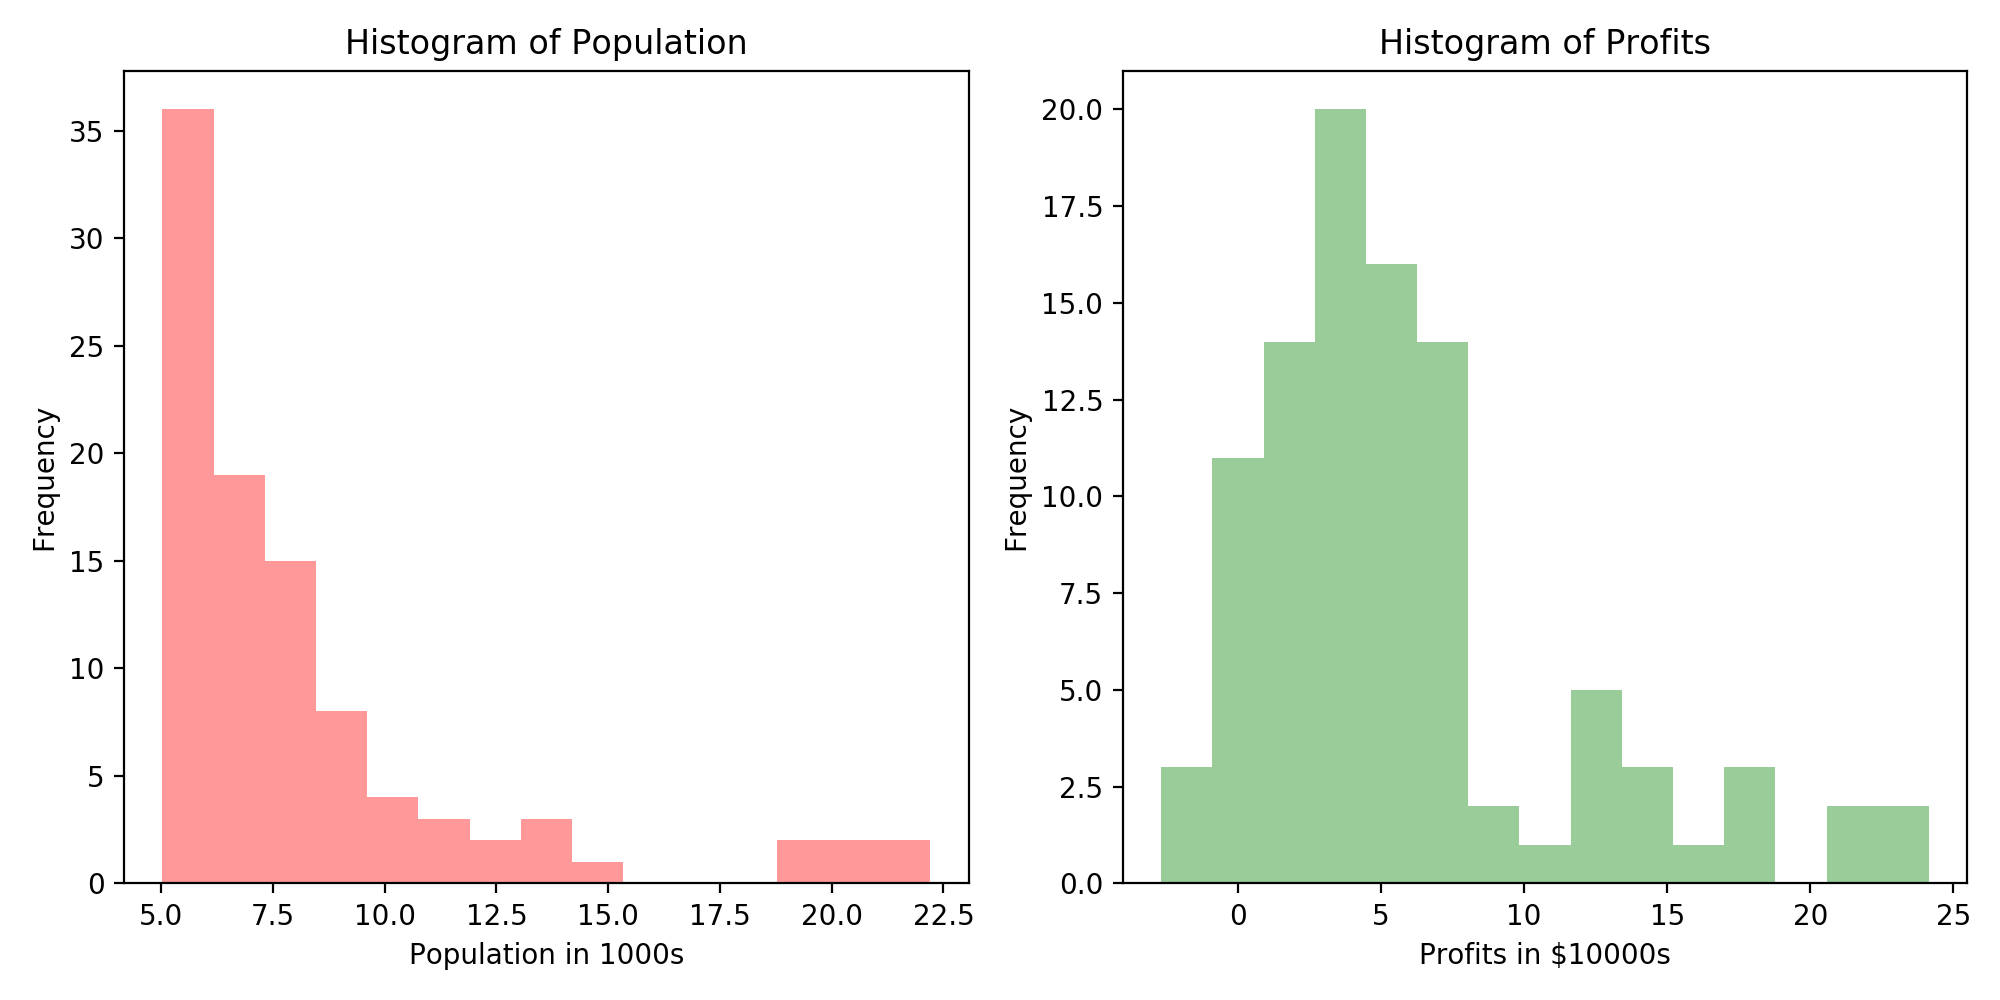

In [6]:
#Plotting histogram of Population 

plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
sns.distplot(X,bins = 15, kde = False, color = 'r')
plt.title("Histogram of Population")
plt.xlabel("Population in 1000s")
plt.ylabel("Frequency")
plt.tight_layout()

#Plotting histogram of Profits


plt.subplot(1,2,2)
sns.distplot(y, bins = 15, kde = False, color = 'g')
plt.title("Histogram of Profits")
plt.xlabel("Profits in $10000s")
plt.ylabel("Frequency")
plt.tight_layout()

In [7]:
#setting up the simulation conditions

iterations =2000
alpha = 0.01

In [8]:
#introducing vectors

X1 = np.append(np.matrix(np.ones(len(data))).transpose(),np.matrix(X).transpose(),axis=1)
y1 = np.matrix(y).transpose()
theta = np.zeros((2,1))

In [9]:
#function to compute cost function
def computecost(X,y,theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1/(2*m))*np.sum(np.square(predictions-y))
    return cost

In [10]:
#function to compute gradient descent

def gradientdescent(X,y,theta,alpha,iterations):
    m = len(y)
    cost_history = np.zeros((iterations,1))
    theta_history = np.zeros((iterations,2))
    for i in range(iterations):
        theta = theta - ((alpha/m) * ((np.dot(X.transpose(),((X.dot(theta))-y)))))
        theta_history[i,:] = theta.transpose()
        cost_history[i] = computecost(X,y,theta)
    return theta,theta_history,cost_history

In [11]:
[theta_ans,theta_hist,cost_hist] = gradientdescent(X1,y1,theta,alpha,iterations)

In [12]:
theta_ans

matrix([[-3.78806857],
        [ 1.18221277]])

In [13]:
Y2 = np.zeros((len(X1),1))
for i in range(len(X1)):
    Y2[i] = theta_ans[0] + (theta_ans[1] * X[i])

<IPython.core.display.Javascript object>


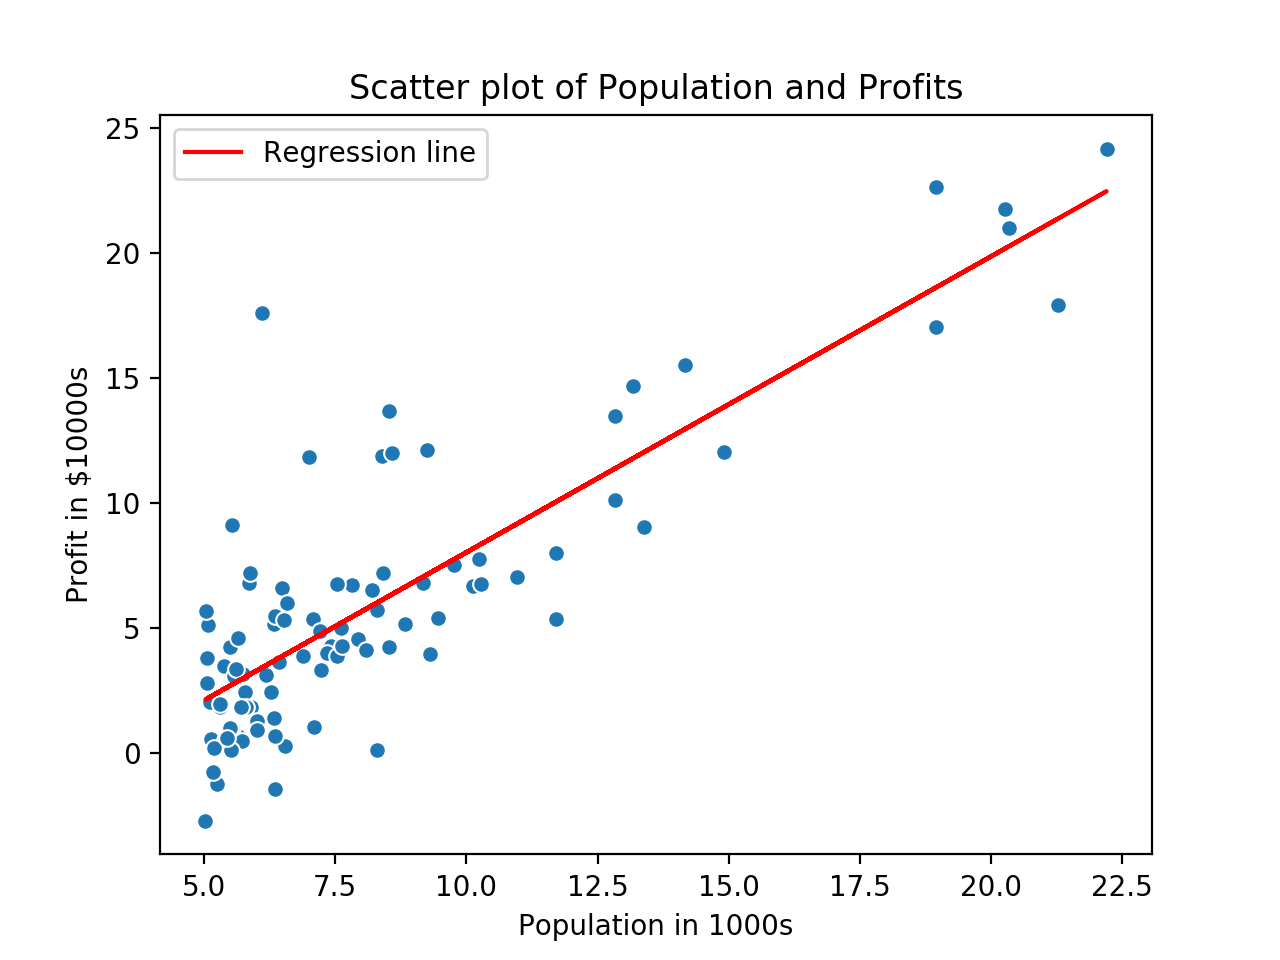

In [14]:
#plotting regression line

%matplotlib notebook
plt.figure()
sns.scatterplot(X,y)
plt.plot(X,Y2, color = 'r', label = "Regression line")
plt.title("Scatter plot of Population and Profits")
plt.xlabel("Population in 1000s")
plt.ylabel("Profit in $10000s")
plt.legend()

<IPython.core.display.Javascript object>


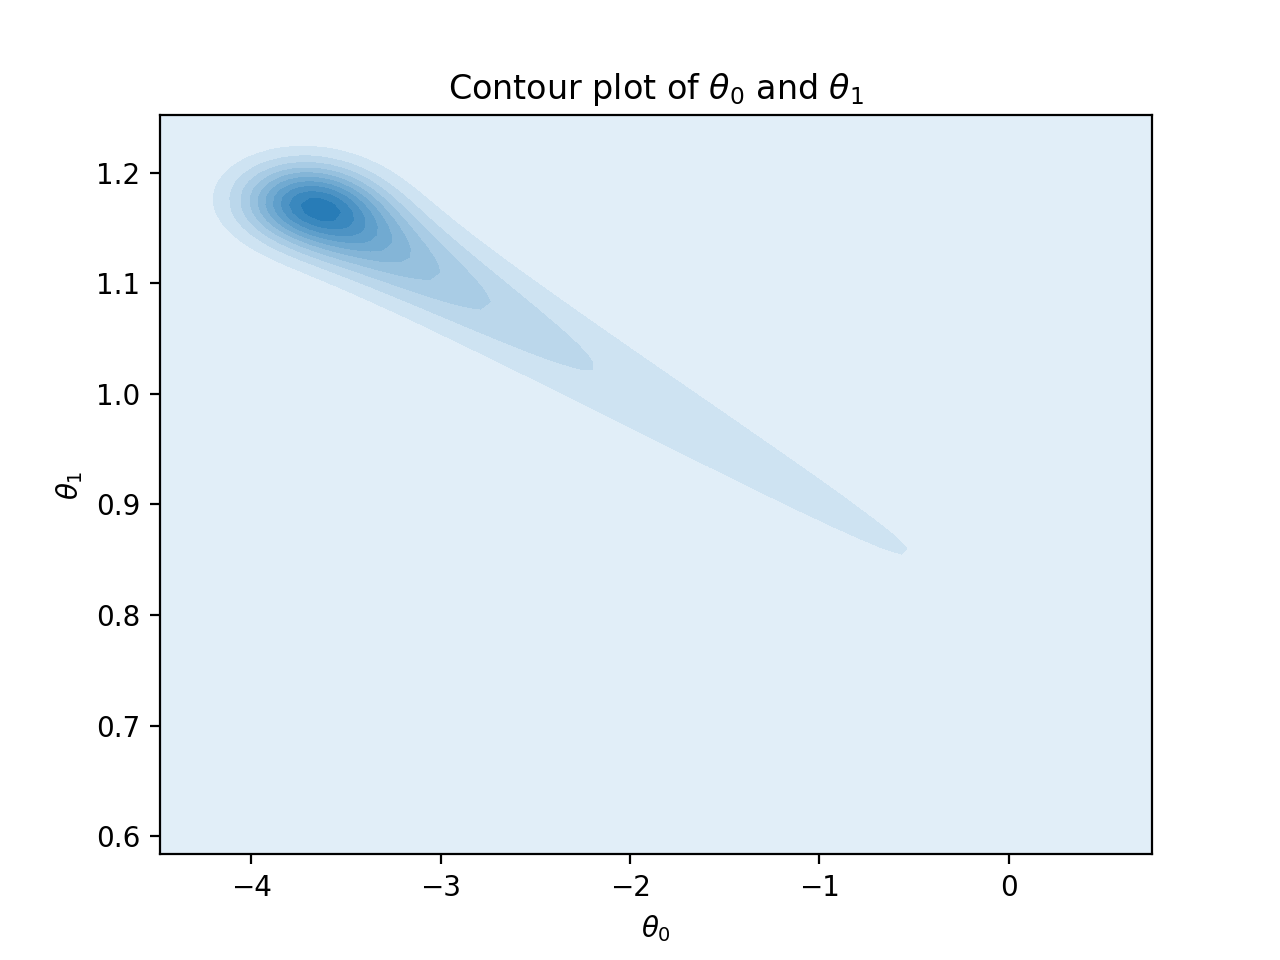

Text(0, 0.5, '$\\theta_1$')

In [15]:
#plotting a contour plot

plt.figure()
sns.kdeplot(theta_hist[:,0],theta_hist[:,1],shade = True)
plt.title(r"Contour plot of $\theta_0$ and $\theta_1$")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")

<IPython.core.display.Javascript object>


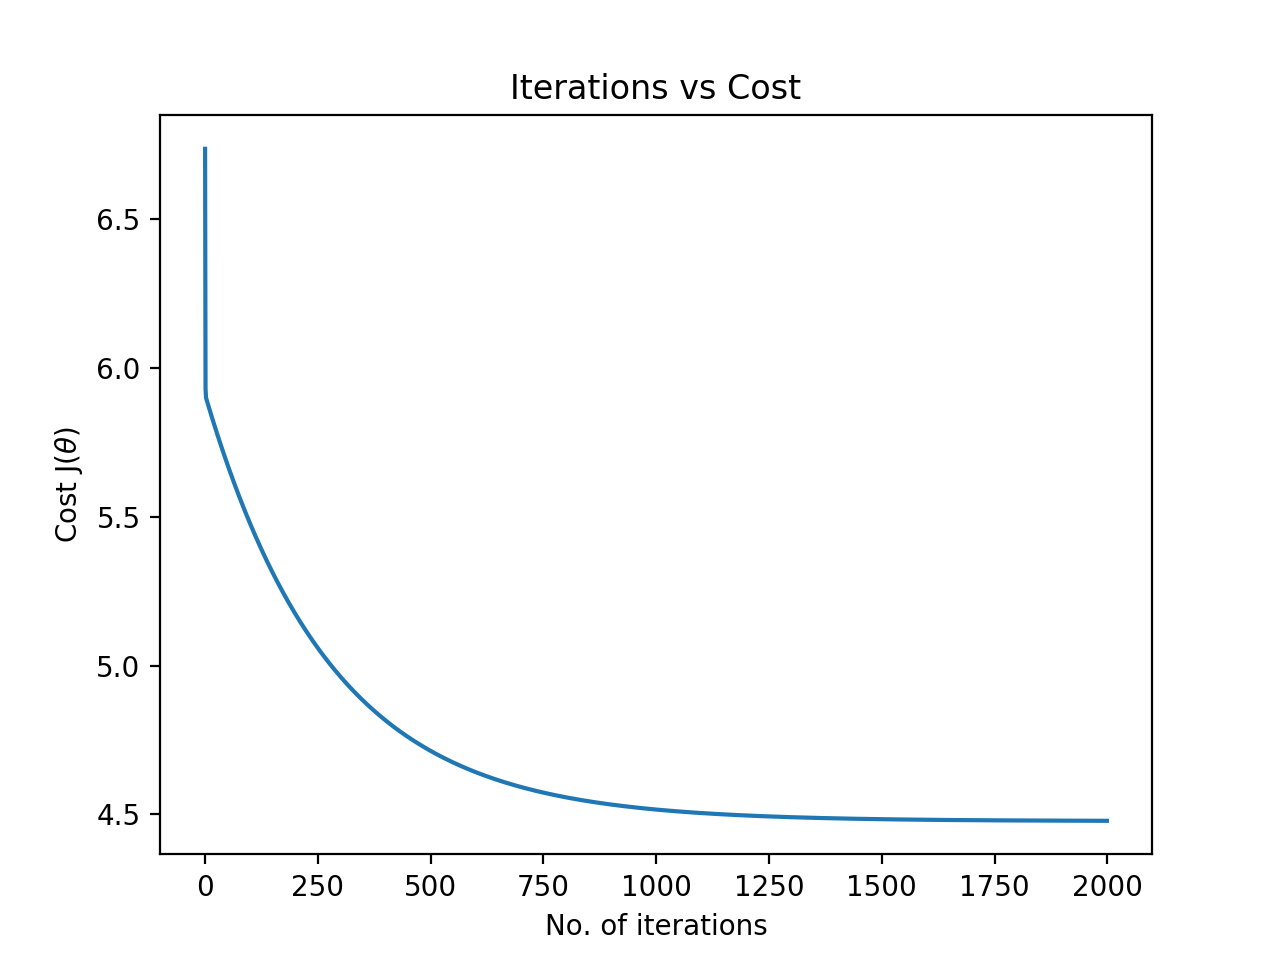

Text(0, 0.5, 'Cost J($\\theta$)')

In [16]:
plt.figure()

plt.plot(range(iterations), cost_hist)
plt.title("Iterations vs Cost")
plt.xlabel("No. of iterations")
plt.ylabel(r"Cost J($\theta$)")